In [27]:
import glob
import dlib
import numpy as np
import pandas as pd
import math
from PIL import Image, ImageDraw
import face_recognition
import random
import cv2        
from pathlib import Path
import random

target = "/special/jbpark/TabS6/TabS6_0?/"
dir_list = glob.glob(target)
dir_list.sort()
dir_list

['/special/jbpark/TabS6/TabS6_00/',
 '/special/jbpark/TabS6/TabS6_02/',
 '/special/jbpark/TabS6/TabS6_03/']

In [28]:
df = pd.read_csv(dir_list[0]+"log.csv")

In [29]:
df

,count,gazeX,gazeY,pitch,roll,gyroX,gyroY,gyroZ,accelX,accelY,accelZ,eulerX,eulerY,eulerZ
0,0,79,110,-32.033745,0.365283,-0.012614,-0.000370,0.000244,0.057458,8.355405,5.216741,8.994660,-2.228900,-1.577498
1,1,79,110,-32.026720,0.369391,-0.007117,-0.000370,0.000855,0.055064,8.355405,5.233500,9.053549,-2.946382,-1.607943
2,2,79,110,-32.022785,0.372160,-0.005284,0.000241,0.000244,0.057458,8.353010,5.243076,8.868560,-2.125535,-1.808344
3,3,79,110,-32.022260,0.374676,-0.000397,0.000241,0.000244,0.055064,8.355405,5.255047,9.021873,-2.196792,-1.513071
4,4,79,110,-32.021664,0.375135,0.000214,-0.000981,0.000244,0.055064,8.353010,5.259835,9.174850,-2.299406,-1.339781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,4019,1359,1706,-31.911673,0.311527,0.006143,0.000164,0.004581,0.055064,8.343434,5.247865,8.377969,-0.241953,-4.797105
4020,4020,1359,1706,-31.915625,0.334262,0.004921,0.000164,0.003971,0.045488,8.355405,5.247865,6.889971,0.148847,-4.761093
4021,4021,1359,1706,-31.914938,0.335613,0.003089,-0.000447,0.005803,0.047882,8.345828,5.238288,7.281829,0.311755,-4.679541
4022,4022,1359,1706,-31.912228,0.348581,0.001256,0.000164,0.003360,0.050276,8.350616,5.231106,6.632558,0.106703,-4.729524


In [30]:
file_name = df["count"].tolist()
len(file_name)

4024

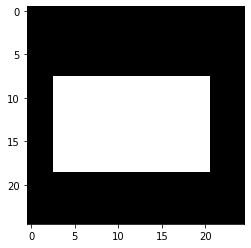

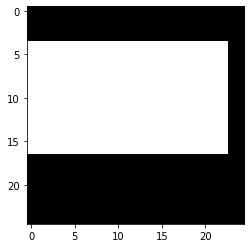

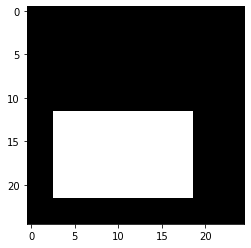

In [31]:
from matplotlib import pyplot as plt
for dir_name in dir_list:
    df = pd.read_csv(dir_name+"log.csv")
    file_name = df["count"].tolist()
    facegrid = np.genfromtxt (dir_name+"facegrid/"+str(file_name[0]).zfill(5)+".csv", delimiter=",")
    plt.imshow(facegrid, cmap='gray', vmin=0, vmax=1)
    plt.show()

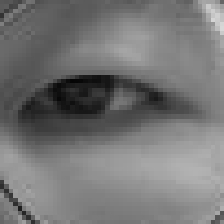

In [9]:
im = Image.open(target+"lefteye/"+str(file_name[0]).zfill(5)+".jpg").convert("L")
im

In [10]:
gazeX = df["gazeX"].tolist()
gazeY = df["gazeY"].tolist()

In [11]:
eulerX = df["eulerX"].tolist()
eulerY = df["eulerY"].tolist()
eulerZ = df["eulerZ"].tolist()

# All Data

In [4]:
import glob
import dlib
import numpy as np
import pandas as pd
import math
from PIL import Image, ImageDraw
import face_recognition
import random
import cv2        
from pathlib import Path
import random

dir_list = ["/special/jbpark/TabS6/TabS6_04/", 
            "/special/jbpark/TabS6/TabS6_05/", 
            "/special/jbpark/TabS6/TabS6_06/",
           "/special/jbpark/TabS6/TabS6_07/",
           "/special/jbpark/TabS6/TabS6_08/"]

In [5]:
left_eye = []
right_eye = []
gaze_point = []
gaze_point = []
euler = []
face_grid = []
left_eye_grid = []
right_eye_grid = []
facepos = []

image_type = "L"

for dir_name in dir_list:
    df = pd.read_csv(dir_name+"log.csv")
    file_name = df["count"].tolist()
    im = Image.open(dir_name+"lefteye/"+str(file_name[0]).zfill(5)+".jpg").convert(image_type)
    gazeX = df["gazeX"].tolist()
    gazeY = df["gazeY"].tolist()
    eulerX = df["eulerX"].tolist()
    eulerY = df["eulerY"].tolist()
    eulerZ = df["eulerZ"].tolist()
    faceX = df["faceX"].tolist()
    faceY = df["faceY"].tolist()
    
    resolution=64
    
    for i in range(len(file_name)):
        left_eye_image = np.asarray(Image.open(dir_name+"lefteye/"+str(file_name[i]).zfill(5)+".jpg").convert(image_type).resize((resolution,resolution)))/255
        right_eye_image = np.asarray(Image.open(dir_name+"righteye/"+str(file_name[i]).zfill(5)+".jpg").convert(image_type).resize((resolution,resolution)))/255
        left_eye.append(left_eye_image)
        right_eye.append(right_eye_image)
        facegrid = np.genfromtxt (dir_name+"facegrid/"+str(file_name[i]).zfill(5)+".csv", delimiter=",")
        face_grid.append(facegrid)
        lefteyegrid = np.genfromtxt (dir_name+"lefteyegrid/"+str(file_name[i]).zfill(5)+".csv", delimiter=",")
        left_eye_grid.append(lefteyegrid)
        righteyegrid = np.genfromtxt (dir_name+"righteyegrid/"+str(file_name[i]).zfill(5)+".csv", delimiter=",")
        right_eye_grid.append(righteyegrid)
        gaze_point.append([int(gazeX[i]),int(gazeY[i])])
        euler.append([float(eulerX[i]), float(eulerY[i]), float(eulerZ[i])])
        facepos.append([float(faceX[i]), float(faceY[i])])
left_eye = np.asarray(left_eye)
right_eye = np.asarray(right_eye)
gaze_point = np.asarray(gaze_point)
face_grid = np.asarray(face_grid)
left_eye_grid = np.asarray(left_eye_grid)
right_eye_grid = np.asarray(right_eye_grid)
euler = np.asarray(euler)
facepos = np.asarray(facepos)

save_dir="/special/jbpark/TabS6illumdata/TabS6_facepos/"
Path(save_dir).mkdir(parents=True, exist_ok=True)
             
#save to File
np.save(save_dir+"gaze_point.npy",gaze_point)
np.save(save_dir+"left_eye.npy",left_eye)
np.save(save_dir+"right_eye.npy",right_eye)
np.save(save_dir+"face_grid.npy",face_grid)
np.save(save_dir+"left_eye_grid.npy",left_eye_grid)
np.save(save_dir+"right_eye_grid.npy",right_eye_grid)
np.save(save_dir+"euler.npy",euler)
np.save(save_dir+"facepos.npy",facepos)

In [6]:
len(gaze_point)

28092

In [7]:
print(right_eye_grid.shape)
print(left_eye_grid.shape)
print(face_grid.shape)
print(facepos.shape)

(28092, 50, 50)
(28092, 50, 50)
(28092, 25, 25)
(28092, 2)


In [8]:
split_length = int(len(gaze_point)*0.9)
target_list = []
for i in range(len(gaze_point)):
    target_list.append([left_eye[i], right_eye[i], gaze_point[i], euler[i], face_grid[i], left_eye_grid[i], right_eye_grid[i], facepos[i]])

random.shuffle(target_list)

train_data = target_list[:split_length]
test_data = target_list[split_length:]
np_train_data = np.asarray(train_data)
np_test_data = np.asarray(test_data)

train_left_eye_list=[]
train_right_eye_list=[]
train_gaze_point_list=[]
train_euler_list=[]
train_face_grid=[]
train_left_eye_grid=[]
train_right_eye_grid=[]
train_facepos=[]

for i in range(len(np_train_data)):
    train_left_eye_list.append(np_train_data[i][0])
    train_right_eye_list.append(np_train_data[i][1])
    train_gaze_point_list.append(np_train_data[i][2])
    train_euler_list.append(np_train_data[i][3])
    train_face_grid.append(np_train_data[i][4])
    train_left_eye_grid.append(np_train_data[i][5])
    train_right_eye_grid.append(np_train_data[i][6])
    train_facepos.append(np_train_data[i][7])
    
test_left_eye_list=[]
test_right_eye_list=[]
test_gaze_point_list=[]
test_euler_list=[]
test_face_grid=[]
test_left_eye_grid=[]
test_right_eye_grid=[]
test_facepos=[]

for i in range(len(np_test_data)):
    test_left_eye_list.append(np_test_data[i][0])
    test_right_eye_list.append(np_test_data[i][1])
    test_gaze_point_list.append(np_test_data[i][2])
    test_euler_list.append(np_test_data[i][3])
    test_face_grid.append(np_test_data[i][4])
    test_left_eye_grid.append(np_test_data[i][5])
    test_right_eye_grid.append(np_test_data[i][6])
    test_facepos.append(np_test_data[i][7])

np_train_gaze_point_list = np.asarray(train_gaze_point_list)
np_train_right_eye_list = np.asarray(train_right_eye_list)
np_train_left_eye_list = np.asarray(train_left_eye_list)
np_train_euler_list = np.asarray(train_euler_list)
np_train_face_grid = np.asarray(train_face_grid)
np_train_left_eye_grid = np.asarray(train_left_eye_grid)
np_train_right_eye_grid = np.asarray(train_right_eye_grid)
np_train_facepos = np.asarray(train_facepos)

np_test_gaze_point_list = np.asarray(test_gaze_point_list)
np_test_right_eye_list = np.asarray(test_right_eye_list)
np_test_left_eye_list = np.asarray(test_left_eye_list)
np_test_euler_list = np.asarray(test_euler_list)
np_test_face_grid = np.asarray(test_face_grid)
np_test_left_eye_grid = np.asarray(test_left_eye_grid)
np_test_right_eye_grid = np.asarray(test_right_eye_grid)
np_test_facepos = np.asarray(test_facepos)

train_dir="/special/jbpark/TabS6illumdata/TabS6_facepos/train_dataset/"
Path(train_dir).mkdir(parents=True, exist_ok=True)
test_dir="/special/jbpark/TabS6illumdata/TabS6_facepos/test_dataset/"
Path(test_dir).mkdir(parents=True, exist_ok=True)

np.save(train_dir+"gaze_point.npy",np_train_gaze_point_list)
np.save(train_dir+"left_eye.npy",np_train_left_eye_list)
np.save(train_dir+"right_eye.npy",np_train_right_eye_list)
np.save(train_dir+"euler.npy",np_train_euler_list)
np.save(train_dir+"face_grid.npy",np_train_face_grid)
np.save(train_dir+"left_eye_grid.npy",np_train_left_eye_grid)
np.save(train_dir+"right_eye_grid.npy",np_train_right_eye_grid)
np.save(train_dir+"facepos.npy",np_train_facepos)


np.save(test_dir+"gaze_point.npy",np_test_gaze_point_list)
np.save(test_dir+"left_eye.npy",np_test_left_eye_list)
np.save(test_dir+"right_eye.npy",np_test_right_eye_list)
np.save(test_dir+"euler.npy",np_test_euler_list)
np.save(test_dir+"face_grid.npy",np_test_face_grid)
np.save(test_dir+"left_eye_grid.npy",np_test_left_eye_grid)
np.save(test_dir+"right_eye_grid.npy",np_test_right_eye_grid)
np.save(test_dir+"facepos.npy",np_test_facepos)

/lvmdata/jbpark/.anaconda3/envs/tensorflow20/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [9]:
import json
import glob
import os
import random
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import concatenate, ZeroPadding2D, Add, add, Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.initializers import Constant
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import multi_gpu_model
import gc
from pathlib import Path

dropout_rate=0
resolution = 64
channels = 1
target="/special/jbpark/TabS6illumdata/TabS6_facepos/train_dataset/"
model_dir = "/special/jbpark/TabS6Model"

# Left Eye
input1 = Input(shape=(64, 64,channels), name='left_eye')
x = Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(input1)
x = MaxPooling2D(pool_size = (2, 2))(x)

x = Conv2D(64, (3, 3), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)

x = Conv2D(128, (3, 3), padding = 'same', activation = 'relu')(x)
left_eye = MaxPooling2D(pool_size = (2, 2))(x)
left_eye = Flatten()(left_eye)

# Right Eye
input2 = Input(shape=(64, 64,channels), name='right_eye')
x = Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(input2)
x = MaxPooling2D(pool_size = (2, 2))(x)

x = Conv2D(64, (3, 3), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), padding = 'same', activation = 'relu')(x)
right_eye = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
right_eye = Flatten()(right_eye)

# Eyes
eyes = concatenate([left_eye, right_eye])
fc1 = Dense(256, activation='relu')(eyes)
fc1 = Dropout(rate=dropout_rate)(fc1)

# Facepos
input5 = Input(shape=(1, 1, 2), name='facepos')
facepos = Flatten()(input5)

#Euler
input3 = Input(shape=(1, 1, 3), name='euler')
euler = Dense(3, activation='relu')(input3)
euler = Flatten()(euler)

# Face Grid
input4 = Input(shape=(25, 25, 1), name='face_grid')
face_grid = Flatten()(input4)
face_grid = Dense(16, activation='relu')(face_grid)

head_pose = concatenate([face_grid, euler, facepos])
fc_f1 = Dense(64, activation='relu')(head_pose)

# FC2, FC3
fc2 = Dense(128, activation='relu')(fc1)
fc2 = concatenate([fc2, fc_f1])
fc3 = Dense(2, activation='linear', name='pred')(fc2)
print(tf.keras.backend.shape(fc3))
print(tf.keras.backend.shape(facepos))
fc3 = add([fc3,facepos])
pred = fc3

model = Model(inputs=[input1, input2, input3, input4, input5], outputs=[pred])

tf.distribute.MirroredStrategy()

model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3))
model.summary()

which = "all"

gaze_point = np.load(target+"gaze_point.npy")
left_eye = np.load(target+"left_eye.npy").reshape(-1,resolution,resolution,channels)
right_eye = np.load(target+"right_eye.npy").reshape(-1,resolution,resolution,channels)
face_grid = np.load(target+"face_grid.npy").reshape(-1,25,25,1)
euler = np.load(target+"euler.npy").reshape(-1,1,1,3)
facepos = np.load(target+"facepos.npy").reshape(-1,1,1,2)

epoch = 1000
Path(model_dir+'/checkpoint').mkdir(parents=True, exist_ok=True)
mc = ModelCheckpoint(model_dir+'/checkpoint/illum_facepos.h5', monitor='val_loss', mode='min', save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
hist = model.fit([left_eye,right_eye, euler, face_grid, facepos],gaze_point, validation_split=0.1,epochs=epoch, callbacks=[es, mc])

Path(model_dir+'/MSEmodels').mkdir(parents=True, exist_ok=True)
model.save(model_dir+'/MSEmodels/illum_facepos.h5')

K.clear_session()
%xdel -n gaze_point
%xdel -n face
%xdel -n left_eye
%xdel -n right_eye
%xdel -n face_grid
%xdel -n euler
gc.collect()
%reset -f

Tensor("Shape:0", shape=(2,), dtype=int32)
Tensor("Shape_1:0", shape=(2,), dtype=int32)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
left_eye (InputLayer)           [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
right_eye (InputLayer)          [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 32)   320         left_eye[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 64, 64, 32)   320         right_eye[0][0]                  
______

22753/22753 [==============================] - 8s 334us/sample - loss: 1089.9660 - val_loss: 6131.5705
Epoch 76/1000
22753/22753 [==============================] - 8s 355us/sample - loss: 1324.6966 - val_loss: 1390.1246
Epoch 77/1000
22753/22753 [==============================] - 8s 341us/sample - loss: 1028.4920 - val_loss: 1408.2737
Epoch 78/1000
22753/22753 [==============================] - 8s 337us/sample - loss: 1001.8475 - val_loss: 1657.0131
Epoch 79/1000
22753/22753 [==============================] - 8s 336us/sample - loss: 1039.2800 - val_loss: 3067.2496
Epoch 80/1000
22753/22753 [==============================] - 8s 335us/sample - loss: 1089.3420 - val_loss: 1701.3327
Epoch 81/1000
22753/22753 [==============================] - 8s 334us/sample - loss: 984.4458 - val_loss: 2664.8015
Epoch 82/1000
22753/22753 [==============================] - 8s 337us/sample - loss: 986.3201 - val_loss: 2119.8992
Epoch 83/1000
22753/22753 [==============================] - 8s 334us/sample - l

In [5]:
import numpy as np
import glob
import math
from PIL import Image, ImageDraw
import random
import gc
from tensorflow.keras.layers import concatenate, add, Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.initializers import Constant
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import math
import time

resolution=64
target="/special/jbpark/TabS6data/TabS6_facepos/test_dataset/"
model_dir = "/special/jbpark/TabS6Model"

gaze_point = np.load(target+"gaze_point.npy")
left_eye = np.load(target+"left_eye.npy").reshape(-1,resolution,resolution,1)
right_eye = np.load(target+"right_eye.npy").reshape(-1,resolution,resolution,1)
euler = np.load(target+"euler.npy").reshape(-1,1,1,3)

#for loop in ["1","2","3","4","5","_all"]:
result=[]
# ["nodata1","noglass","nodata3","nodata4","nodata5","all"]:
new_model = load_model(model_dir+'/MSEmodels/facepos.h5')
start_time = time.perf_counter()
result = new_model.evaluate([left_eye,right_eye,euler],gaze_point, batch_size=32)
elapsed_time = time.perf_counter() - start_time
result = (math.sqrt(result)/1440)*7
print("Data Tested on Model tabs6 result: "+str(result)+" elapsed time: "+ str(elapsed_time))

K.clear_session()
%xdel -n gaze_point
%xdel -n face
%xdel -n left_eye
%xdel -n right_eye
%xdel -n face_grid
gc.collect()
%reset -f 

403/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Data Tested on Model tabs6 result: 0.1012351605902097 elapsed time: 0.22767346701584756


##### if you get error with toco_protos or toco run the python code with terminal or convert whole file to .py file then run

In [13]:
import numpy as np
import tensorflow as tf
from pathlib import Path
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, load_model

model_dir = "/special/jbpark/TabS6Model/MSEmodels/"
keras_file = 'illum_facepos.h5'
# Convert to TensorFlow Lite model.
model = load_model(keras_file)

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('tflite/illum_facepos.tflite', 'wb') as f:
    f.write(tflite_model)

OSError: SavedModel file does not exist at: facepos.h5/{saved_model.pbtxt|saved_model.pb}

In [1]:
import tensorflow as tf

tflite = tf.lite.Interpreter(model_path="/special/jbpark/TabS6Model/checkpoint/tflite/illum_facepos.tflite")
tflite.get_input_details()

[{'name': 'left_eye',
  'index': 4,
  'shape': array([ 1, 64, 64,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'euler',
  'index': 1,
  'shape': array([1, 1, 1, 3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'facepos',
  'index': 3,
  'shape': array([1, 1, 1, 2], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'face_grid',
  'index': 2,
  'shape': array([ 1, 25, 25,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'right_eye',
  'index': 56,
  'shape': array([ 1, 64, 64,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]